<a href="https://colab.research.google.com/github/sparks-baird/self-driving-lab-demo/blob/main/notebooks/ac-2023/bayes-opt/1.0-sgb-clslab-light-simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick Start

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [ ]:
if IN_COLAB:
    %pip install self-driving-lab-demo[ax-platform]

In [ ]:
from self_driving_lab_demo import SelfDrivingLabDemoLight, get_paho_client

PICO_ID = "test"  # @param {type:"string"}
simulation = True  # @param {type:"boolean"}

# instantiate client once and reuse (to avoid opening too many connections)
client = get_paho_client(f"sdl-demo/picow/{PICO_ID}/as7341/")

sdl = SelfDrivingLabDemoLight(
    autoload=True,  # perform target data experiment automatically
    observe_sensor_data_kwargs=dict(pico_id=PICO_ID, client=client),
    simulation=simulation,
)

In [ ]:
R = 0  # @param {type:"slider", min:0, max:89, step:1}
G = 50  # @param {type:"slider", min:0, max:89, step:1}
B = 0  # @param {type:"slider", min:0, max:89, step:1}
params = {"R": R, "G": G, "B": B}
sdl.observe_sensor_data(params)

{'ch410': 311.48061891243384,
 'ch440': 152.10324137933273,
 'ch470': 539.5366467030707,
 'ch510': 37059.58075615245,
 'ch550': 11520.097885546445,
 'ch583': 1235.5961464104114,
 'ch620': 126.21262172658409,
 'ch670': 56.887315844266325}

<img src="https://github.com/sparks-baird/self-driving-lab-demo/blob/main/notebooks/green-led.jpg?raw=1" width=300>

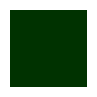

In [ ]:
import matplotlib.pyplot as plt

def plot_color(parameters):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.imshow([[tuple(parameters.values())]])
    ax.set_axis_off()
    plt.show()

plot_color(params)

This is the color that we're trying to match:

In [ ]:
target = sdl.get_target_inputs()
target

{'R': 41, 'G': 3, 'B': 31}

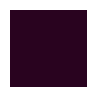

In [ ]:
plot_color(target)

This is the objective that we want to minimize (i.e., minimize the color distance between what we observe and what we're trying to get).

In [ ]:
sdl.evaluate(params)["mae"]

19256.754840351714

Notice how if we get the exact solution, the color distance is zero (NOTE: this will be non-zero if `simulation=False`).

In [ ]:
sdl.evaluate(target)["mae"]

0.0

## Setup

### Create the `parameters` dictionary
The lower bound for the power levels is 0. The upper bound is 89 (technically 255, but it's too bright).

In [ ]:
bounds = {"R": (0, 89), "G": (0, 89), "B": (0, 89)}

#### Examples

<details><summary>Branin equation</summary>

```python
[
        {
            "name": "x1",
            "type": "range",
            "bounds": [-5.0, 10.0],
        },
        {
            "name": "x2",
            "type": "range",
            "bounds": [0.0, 10.0],
        },
    ]
```

</details>

<details><summary>Hartmann 6 equation</summary>

```python
[
        {
            "name": "x1",
            "type": "range",
            "bounds": [0.0, 1.0],
            "value_type": "float",  # Optional, defaults to inference from type of "bounds".
            "log_scale": False,  # Optional, defaults to False.
        },
        {
            "name": "x2",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
        {
            "name": "x3",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
        {
            "name": "x4",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
        {
            "name": "x5",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
        {
            "name": "x6",
            "type": "range",
            "bounds": [0.0, 1.0],
        },
    ]
```

</details>

In [ ]:
parameters = ... # insert your code here

### AxClient

In [ ]:
from ax.service.ax_client import AxClient

ax_client = AxClient()
ax_client.create_experiment(
    name = "ac-2023-tutorial",
    parameters = ..., # insert your code here
    minimize = ..., # insert your code here
)

### Optimization loop

In [ ]:
for _ in range(15):
    parameters, trial_index = ax_client.get_next_trial()
    raw_data = ... # insert your code here
    ax_client.complete_trial(trial_index=trial_index, raw_data=raw_data)

### Best parameters

In [ ]:
best_parameters, metrics = ax_client.get_best_parameters()